<a href="https://colab.research.google.com/github/Jalalbaim/K-Means-from-scratch/blob/main/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN algorithm from scratch**
***
BAIM MOHAMED
***
On va essayer d'implémenter l'algorithme de classification KNN from scratch

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
class KNN :
  def __init__(self, k):
    self.k = k

  def distance_eucliden(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def _predict(self, x):

        distances = [self.distance_eucliden(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)

        k_nearest_labels = [self.y_train[i] for i in k_indices[:self.k]]

        label_counts = {}
        for label in k_nearest_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1

        max_count = 0
        most_common_label = None
        for label, count in label_counts.items():
            if count > max_count:
                max_count = count
                most_common_label = label

        return most_common_label

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

- La Classification par KNN est une **Méthode supervisée**

      Nécessite :

        – Ensemble d'apprentissage avec des classes
        connues

        – k est une valeur fixée à l'avance (1, 3,...)

- Pour cela on utilisera les exemples fournis par la bibliothèque Scikit Learn :

      - from sklearn import datasets
      - Dataset Iris

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [19]:
iris = datasets.load_iris()
X = iris.data # features
y = iris.target # target

In [20]:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [21]:
knn_classifier = KNN(k=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [22]:
print('The predicted values are:')
print(y_pred)
print('')
print('The actual values are:')
print(y_test)
print('')

The predicted values are:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

The actual values are:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]



In [23]:
def score(y1,y2):
  n=0
  for i in y1:
    if y1[i] == y2[i]:
      n += 1
  return n/len(y1)

In [24]:
print("score KNN: ", score(y_pred, y_test)*100,"%")

score KNN:  100.0 %


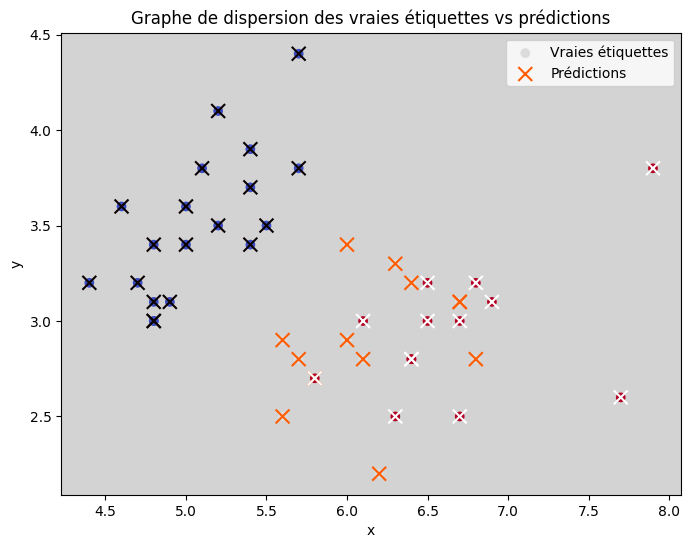

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', label='Vraies étiquettes')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='hot', marker='x', s=100, label='Prédictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Graphe de dispersion des vraies étiquettes vs prédictions')
plt.gca().set_facecolor('lightgray')
plt.show()